In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier


In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
Y = iris.target

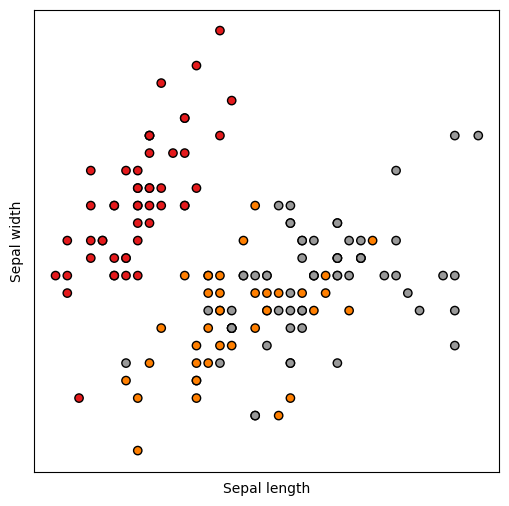

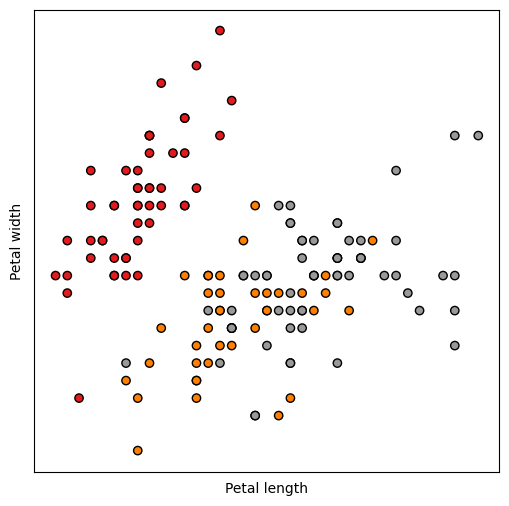

In [4]:

plt.figure(2, figsize=(6, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(2, figsize=(6, 6))
plt.clf()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xticks(())
plt.yticks(())
plt.show()

In [205]:
# Split in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=69)

In [247]:
scale = Normalizer().fit(X_train)
X_train_norm = scale.transform(X_train)
X_test_norm = scale.transform(X_test)

scale2 = Normalizer().fit(X)
X_norm = scale2.transform(X)


In [248]:
print(X_train[0:5])
print(X_train_norm[0:5])

[[4.6 3.2 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 3.  4.9 1.8]
 [7.7 2.6 6.9 2.3]]
[[0.79594782 0.55370283 0.24224499 0.03460643]
 [0.78609038 0.57170209 0.23225397 0.03573138]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.70600618 0.2383917  0.63265489 0.21088496]]


In [249]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

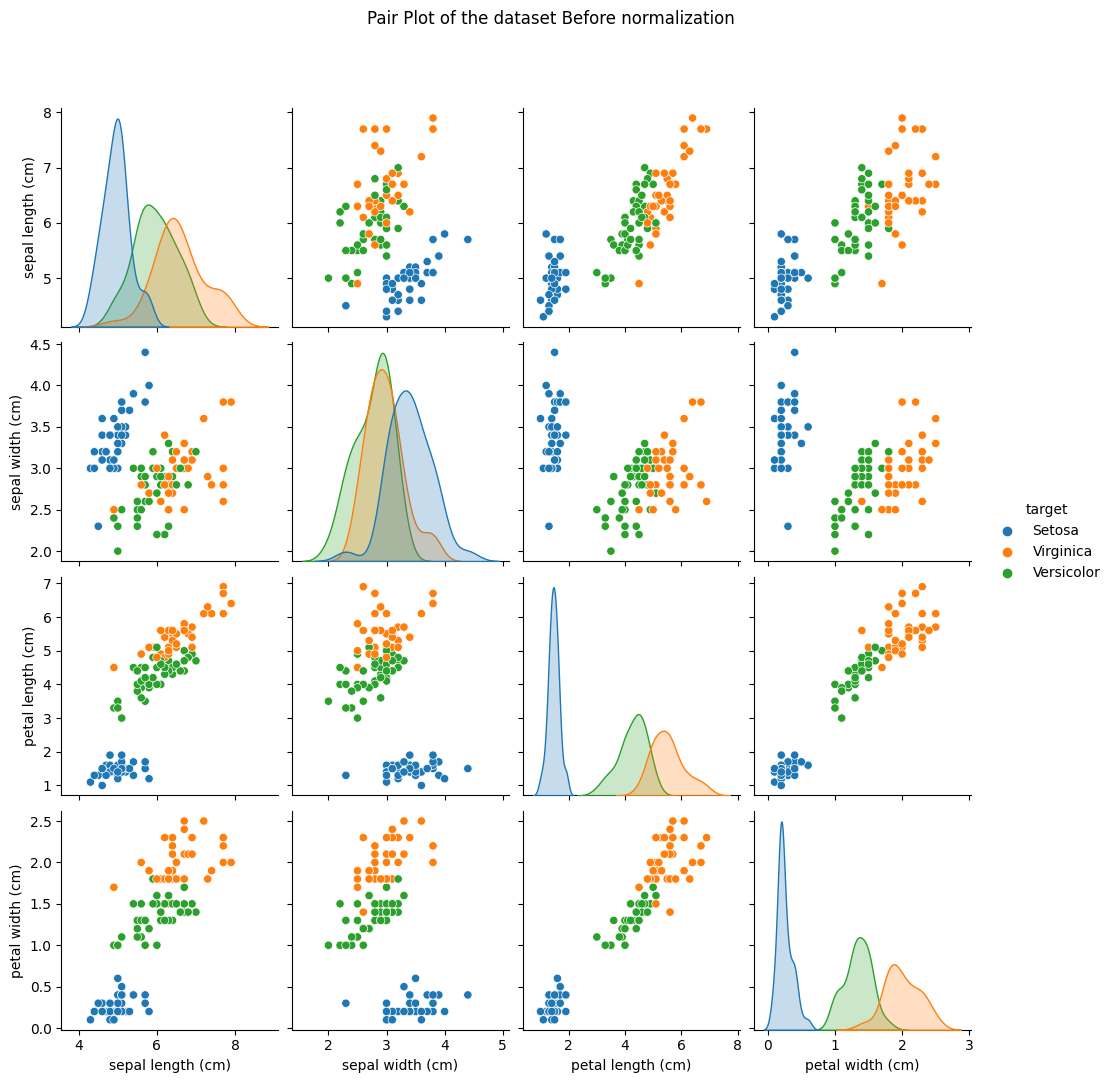

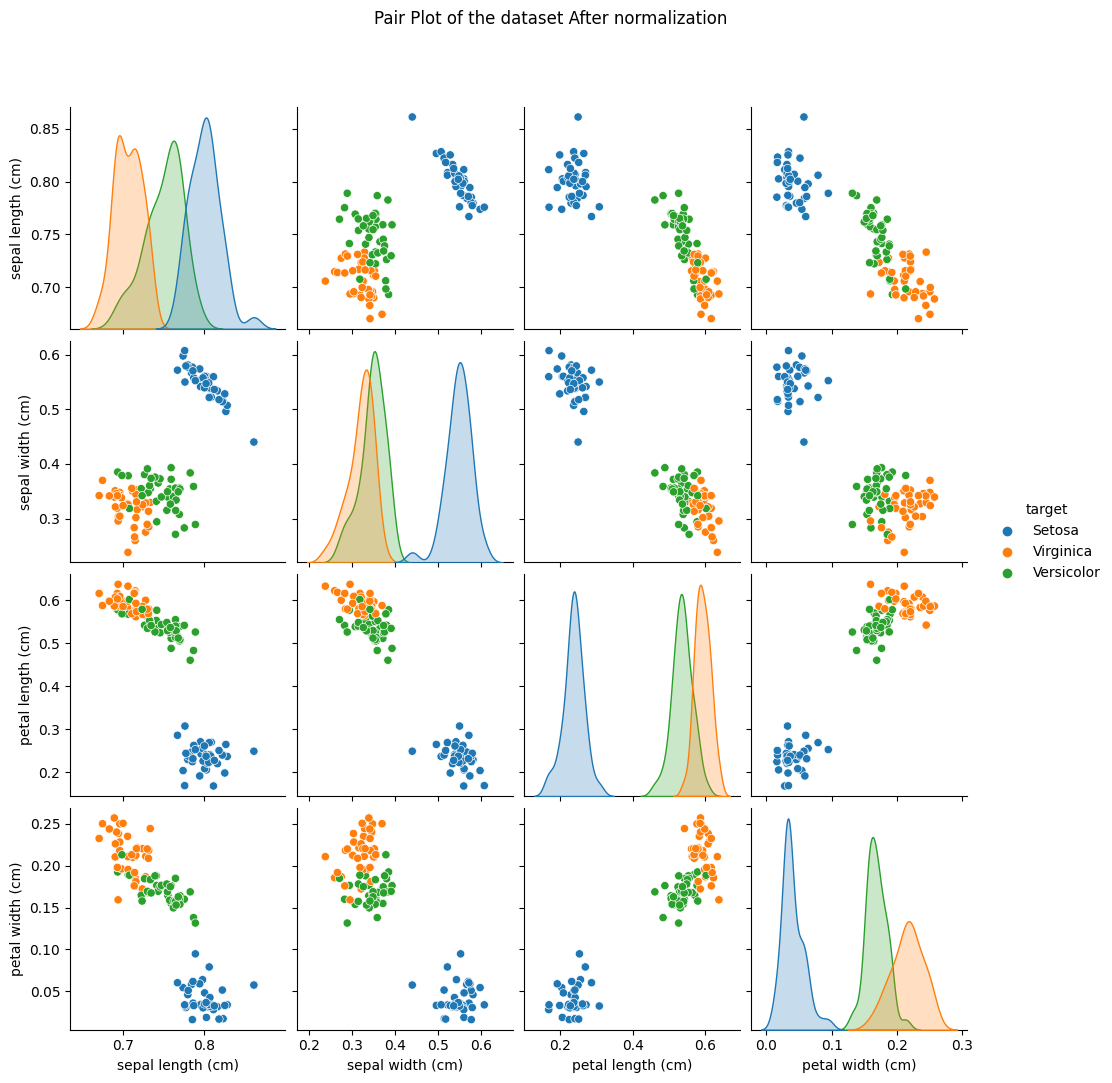

In [250]:
## Before
# View the relationships between variables; color code by species type
iris_df= pd.DataFrame(data= np.c_[X_train, Y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[X_train_norm, Y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [251]:
from sklearn.metrics import accuracy_score

In [252]:
K = 3
knn = KNeighborsClassifier(K)
knn.fit(X_train_norm, Y_train)
y_pred_sklearn= knn.predict(X_test)

print(Y_test)
print(y_pred_sklearn)
print(np.count_nonzero(Y_test!=y_pred_sklearn))
print(accuracy_score(Y_test, y_pred_sklearn))

[0 1 0 2 0 0 1 2 2 0 2 2 0 1 2 1 1 2 1 2 2 1 0 0 2 0 2 2 1 0]
[0 1 0 2 0 0 1 2 1 0 2 2 0 1 2 1 1 2 1 2 2 1 0 0 2 0 2 2 1 0]
1
0.9666666666666667


In [253]:
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.tolist().count)

In [254]:
def L1(X1 : np.ndarray, X2 : np.ndarray) -> float:
    return np.linalg.norm(X1-X2, ord = 1, axis = 1)

def L2(X1 : np.ndarray, X2 : np.ndarray) -> float:
    return np.linalg.norm(X1-X2, ord = 2, axis = 1)

In [255]:
from typing import Callable

class MY_KNN():
    
    def __init__(self, k : int, metric : Callable[[np.ndarray], float]):
        self.k = k
        self.metric = metric
        
    def fit(self, X, Y, Wi = None):
        self.X = X
        self.Y = Y
        self.Wi = Wi
        self.labels = np.unique(Y)
    
    def __predict_one(self, x : np.ndarray):
        distances = self.metric(x, self.X)
        y_sorted = self.Y[distances.argsort()]
        k_nearest = y_sorted[:self.k]            
        votes = np.empty(self.labels.shape)
        for j, label in enumerate(self.labels):
            if (self.Wi):
                votes[j] = np.sum((k_nearest==label)*self.Wi(np.arange(k_nearest.shape)))
            else:
                votes[j] = np.sum((k_nearest==label))
        label = np.argmax(votes)
        return label
        pass
    
    def predict(self, X : np.ndarray):
        prediction = np.empty(X.shape[0])
        pred2 = np.vectorize(lambda x : self.__predict_one(x))(X)
        for i,x in enumerate(X):            
            prediction[i] = self.__predict_one(x)
        return prediction

In [256]:
K = 3
KNN = MY_KNN(K, L2)
KNN.fit(X_train_norm, Y_train)
prediction = KNN.predict(X_test_norm)
print(prediction)
print(np.count_nonzero(Y_test!=prediction))
print(accuracy_score(Y_test, prediction))

[0. 1. 0. 2. 0. 0. 1. 2. 1. 0. 2. 2. 0. 1. 2. 1. 1. 2. 1. 2. 2. 1. 0. 0.
 2. 0. 2. 2. 1. 0.]
1
0.9666666666666667


In [257]:
from typing import Callable

class MY_KNN_POTENTIAL():
    def __init__(self, metric : Callable[[np.ndarray], float]):
        self.metric = metric
        self.accuracy_history = []
        
    def fit(self, X, Y, Wi = None):
        self.X = X
        self.Y = Y
        self.labels = np.unique(Y)
        self.gamma = np.zeros(X.shape[0])
        self.__train()
    
    def __train(self, requsted_accuracy : float = 0.95):
        accuracy = 0.0
        indices = np.arange(self.X.shape[0])
#         np.random.shuffle(indices)
        shuffled_X = self.X
        shuffled_Y = self.Y
        
        count = 0        
        while (accuracy<requsted_accuracy and count < 1000):
            new_gamma = self.gamma.copy()
            for i,x in enumerate(shuffled_X):
                if (self.__predict_one(x) != shuffled_Y[i]):
                    new_gamma[i] += 1
                    self.gamma[i] += 1
#             self.gamma = new_gamma
            count += 1
            accuracy = accuracy_score(self.Y, self.predict(shuffled_X))
            self.accuracy_history.append(accuracy)
#             print(f"{accuracy:.4}")
            
    def history(self):
        return self.accuracy_history
    
    @staticmethod
    def Kernel(r, a = 1):
        return 1/(r+a)
    
    def w(self, u):
        return self.gamma*self.Kernel(self.metric(u, self.X)/self.h())
        
    def h(self):
        return 1.0
    
    def __predict_one(self, x):
        distances = self.metric(x, self.X)
        votes = np.empty(X.shape[0])
        for j, label in enumerate(self.labels):                
            votes[j] = (np.sum((self.Y==label)*self.w(x)))
        label = np.array(votes).argmax()
        return label
            
    def predict(self, X : np.ndarray):
        prediction = np.empty(X.shape[0])
        for i,x in enumerate(X):
            prediction[i] = self.__predict_one(x)
        return prediction      

In [258]:
model = MY_KNN_POTENTIAL(L2)

In [259]:
model.fit(X_train_norm, Y_train)

Test accuracy: 0.0


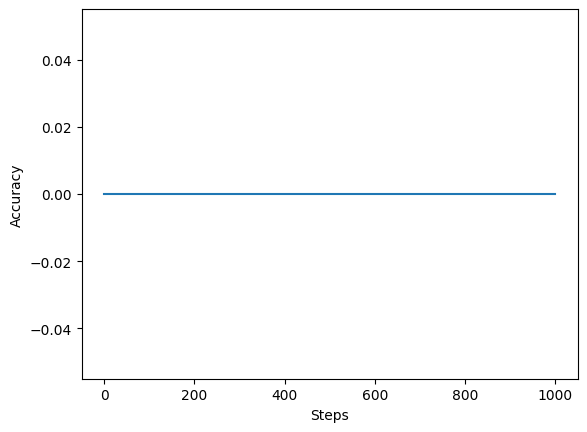

In [260]:
prediction = model.predict(X_test_norm)
# print(prediction)
print(f"Test accuracy: {accuracy_score(Y_test, prediction):.4}")

plt.plot(model.history())
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

In [261]:
from sklearn.model_selection import cross_val_score

In [393]:
def K_Fold_Cross_Val(X : np.ndarray, Y : np.ndarray, n : int, random_state = None) -> np.ndarray:
    random_state = 0
    scores = np.empty(X.shape[0])
    splits_X = np.array_split(X, n)
    splits_Y = np.array_split(Y, n)
    for i in range(n):
        print(len(splits_X[:i+1]))
        print(len(splits_X[i+1:]))
        X_train = np.concatenate((splits_X[:i+1],splits_X[i+1:]))
        Y_train = np.concatenate((splits_Y[:i+1],splits_Y[i+1:]))
        X_test = splits_X[i]
        Y_test = splits_Y[i]     
        
        model = MY_KNN_POTENTIAL(L2)
        print(X_train)
        print(Y_train)
        model.fit(X_train, Y_train)
        
        prediction = model.predict(X_test)
        scores[i] = accuracy_score(Y_test, prediction)

    return scores

In [394]:
K_Fold_Cross_Val(X_norm, Y, 5)

1
4
[[[0.80377277 0.55160877 0.22064351 0.0315205 ]
  [0.82813287 0.50702013 0.23660939 0.03380134]
  [0.80533308 0.54831188 0.2227517  0.03426949]
  [0.80003025 0.53915082 0.26087943 0.03478392]
  [0.790965   0.5694948  0.2214702  0.0316386 ]
  [0.78417499 0.5663486  0.2468699  0.05808704]
  [0.78010936 0.57660257 0.23742459 0.0508767 ]
  [0.80218492 0.54548574 0.24065548 0.0320874 ]
  [0.80642366 0.5315065  0.25658935 0.03665562]
  [0.81803119 0.51752994 0.25041771 0.01669451]
  [0.80373519 0.55070744 0.22325977 0.02976797]
  [0.786991   0.55745196 0.26233033 0.03279129]
  [0.82307218 0.51442011 0.24006272 0.01714734]
  [0.8025126  0.55989251 0.20529392 0.01866308]
  [0.81120865 0.55945424 0.16783627 0.02797271]
  [0.77381111 0.59732787 0.2036345  0.05430253]
  [0.79428944 0.57365349 0.19121783 0.05883625]
  [0.80327412 0.55126656 0.22050662 0.04725142]
  [0.8068282  0.53788547 0.24063297 0.04246464]
  [0.77964883 0.58091482 0.22930848 0.0458617 ]
  [0.8173379  0.51462016 0.25731008 

ValueError: operands could not be broadcast together with shapes (5,) (5,4) 

In [413]:
a = np.arange(10)
b = np.array_split(a, 5)
i = 4
Train = np.concatenate((b[:i],b[i+1:]))
Test = b[i]
print(b)
print(Train)
# b

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)